<span style="color:pink">## choose the percentile to consider extreme; choose a timestep to begin movie</span>

In [17]:
percentile = 99.999

timestamp_chosen = "0000384720"
# 0000460080 is one of the last ones
# 0000000720 is the first one
# 0000144720 is the 600th index
# 0000384720 is the 1600th index

In [10]:
import sys
sys.path.append('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start')
from my_functions import *

working
i_t: 600


/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start/my_functions.py:64: RuntimeWarning: divide by zero encountered in log
  positive_data = np.where(variable_data > 0, np.log(variable_data), 0)


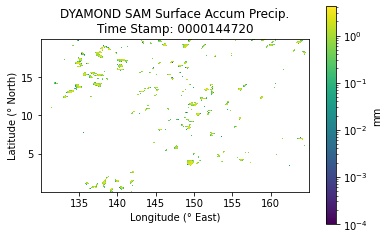

In [11]:
plot_singletime_var(variable ="Precac", timestamp="0000144720")

In [12]:
# Step 1: Prepare your data for the specific region in longitude and latitude coordinates
df = loadRelTable()
def prec_from_timestamp(timestamp):
    seg_index = timestamp_to_seg_index(timestamp)
    print("i_t:", seg_index)
    if seg_index == 0:
        seg_index = 1
    prec = loadPrec(seg_index, df)
    prec_filename = loadPrecacFilename(seg_index, df)

    # Replace negative values with NaN
    prec = xr.where(prec < 0, np.nan, prec)
    return prec, seg_index

prec, seg_index_chosen = prec_from_timestamp(timestamp_chosen)
variable_data = prec.values
lon = prec.lon.values
lat = prec.lat.values
print(prec.dims)
print(prec.dtype)
print(prec.max())
print(prec)
# Calculate the number of values between the min and max
num_values_between_min_max = np.count_nonzero((prec >= prec.min()) & (prec <= prec.max()))
print("Number of values between min and max:", num_values_between_min_max)

i_t: 1600
('lat', 'lon')
float32
<xarray.DataArray 'Precac' ()>
array(55.58898926)
<xarray.DataArray 'Precac' (lat: 518, lon: 896)>
array([[7.7819824e-04, 6.5612793e-04, 5.6457520e-04, ..., 3.4332275e-05,
        5.3405762e-05, 8.0108643e-05],
       [8.5449219e-04, 5.4931641e-04, 4.9591064e-04, ..., 5.6266785e-05,
        9.9182129e-05, 8.7738037e-05],
       [7.0190430e-04, 4.7302246e-04, 4.8065186e-04, ..., 8.2015991e-05,
        6.8664551e-05, 7.6293945e-05],
       ...,
       [1.4343262e-03, 1.5563965e-03, 1.2817383e-03, ..., 1.3122559e-03,
        1.2207031e-03, 1.1901855e-03],
       [1.5869141e-03, 1.4953613e-03, 1.2512207e-03, ..., 1.6174316e-03,
        1.6174316e-03, 1.4953613e-03],
       [1.4648438e-03, 1.4953613e-03, 1.3732910e-03, ..., 1.3732910e-03,
        1.5258789e-03, 1.6479492e-03]], dtype=float32)
Coordinates:
  * lat      (lat) float32 0.01931 0.05794 0.09657 0.1352 ... 19.91 19.95 19.99
  * lon      (lon) float32 130.0 130.1 130.1 130.1 ... 164.9 164.9 164.9 16

In [13]:
# Step 2: Calculate the threshold value corresponding to the chosen percentile
threshold = np.nanpercentile(prec, percentile)
print(threshold)

47.92912761046976


In [14]:
# Step 3: Filter out extreme values above the threshold

extreme_values = xr.where(prec >= threshold, prec, np.nan)
extreme_values_lon = extreme_values.lon.values
extreme_values_lat = extreme_values.lat.values

print(extreme_values)
print("max:",extreme_values.max())
print("min:",extreme_values.min())
print("mean:",extreme_values.mean())

<xarray.DataArray 'Precac' (lat: 518, lon: 896)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 0.01931 0.05794 0.09657 0.1352 ... 19.91 19.95 19.99
  * lon      (lon) float32 130.0 130.1 130.1 130.1 ... 164.9 164.9 164.9 165.0
max: <xarray.DataArray 'Precac' ()>
array(55.58898926)
min: <xarray.DataArray 'Precac' ()>
array(48.23086548)
mean: <xarray.DataArray 'Precac' ()>
array(51.213966, dtype=float32)


In [15]:
# Calculate the number of values between the min and max
num_values_between_min_max = np.count_nonzero((extreme_values >= extreme_values.min()) & (extreme_values <= extreme_values.max()))
print("Number of values between min and max:", num_values_between_min_max)

Number of values between min and max: 5


In [16]:
import numpy as np

extreme_values = xr.where(prec >= threshold, prec, np.nan)
extreme_values_lon = extreme_values.lon.values
extreme_values_lat = extreme_values.lat.values

# convert to numpy array
extreme_values_np = extreme_values.values

# get non-NaN values and their coordinates
non_nan_values = extreme_values_np[~np.isnan(extreme_values_np)]
non_nan_indices = np.argwhere(~np.isnan(extreme_values_np))

for index in non_nan_indices:
    value = extreme_values_np[tuple(index)]
    lon = extreme_values_lon[index[1]]
    lat = extreme_values_lat[index[0]]
    print(f"Value: {value}, Lon: {lon}, Lat: {lat}")


Value: 55.5889892578125, Lon: 136.97265625, Lat: 7.011067867279053
Value: 54.518402099609375, Lon: 132.12889099121094, Lat: 9.05837631225586
Value: 49.233856201171875, Lon: 157.48045349121094, Lat: 9.29014778137207
Value: 48.497711181640625, Lon: 163.61328125, Lat: 14.736762046813965
Value: 48.230865478515625, Lon: 153.80859375, Lat: 18.56098175048828


# Seeing time evolution of an extreme

In [18]:
# last index:

last_timestamp = "0000460800"
last_prec, last_index = prec_from_timestamp(last_timestamp)

i_t: 1917


## fixing threshold value, quantifying how many above threshold over time

In [19]:
extremes_quantity = []
for i_seg in range(seg_index_chosen, last_index + 1):
    prec_t = loadPrec(i_seg, df)

    # Replace negative values with NaN
    prec_t = xr.where(prec_t < 0, np.nan, prec_t)
    
    # Count the number of values above the threshold and append it to the list
    count_above_threshold = np.count_nonzero(prec_t > threshold)
    extremes_quantity.append(count_above_threshold)

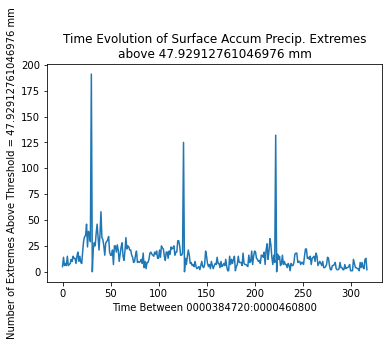

In [22]:
plt.plot(extremes_quantity)

# Set labels and title
plt.xlabel(f"Time Between {timestamp_chosen}:{last_timestamp}")
plt.ylabel(f"Number of Extremes Above Threshold = {threshold} mm")
plt.title(f"Time Evolution of Surface Accum Precip. Extremes\nabove {threshold} mm")

# Display the plot
plt.show()

# Save the plot to the specified folder
save_folder = "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start/precac/time_plots"
save_path = os.path.join(save_folder, 'counts8.png')
# plt.savefig(save_path)

# Close the plot
plt.close()

# seeing changes in threshold value

In [23]:
threshold_evolution = []
for i_seg in range(seg_index_chosen, last_index + 1):
    prec_t = loadPrec(i_seg, df)

    # Replace negative values with NaN
    prec_t = xr.where(prec_t < 0, np.nan, prec_t)
    

    threshold_t = np.nanpercentile(prec_t, percentile)
    threshold_evolution.append(threshold_t)


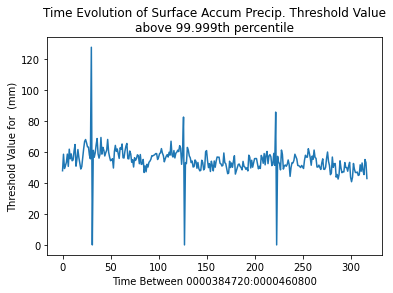

In [25]:
plt.plot(threshold_evolution)

# Set labels and title
plt.xlabel(f"Time Between {timestamp_chosen}:{last_timestamp}")
plt.ylabel(f"Threshold Value for  (mm)")
plt.title(f"Time Evolution of Surface Accum Precip. Threshold Value\nabove {percentile}th percentile")

# Display the plot
plt.show()

# Save the plot to the specified folder
save_folder = "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start/precac/time_plots"
save_path = os.path.join(save_folder, 'threshold1.png')
# plt.savefig(save_path)

# Close the plot
plt.close()

## fixing location, percentile

100%|██████████| 318/318 [00:28<00:00, 11.32it/s]


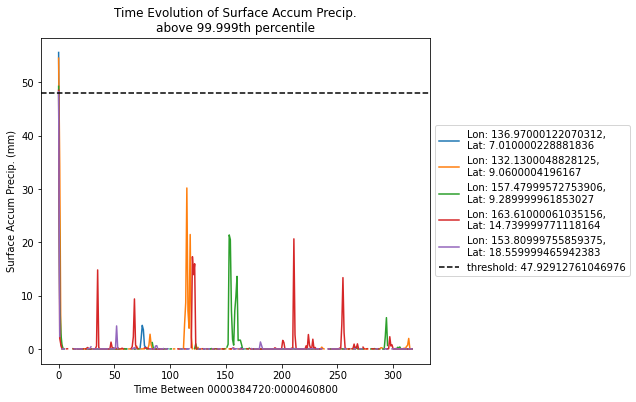

In [26]:
import matplotlib.pyplot as plt
# matplotlib.use("TkAgg")

# Create a figure and axes
# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(8, 6))

# Create a set to store unique lon-lat combinations
lon_lat_set = set()

# Iterate through each identified value
for index in non_nan_indices:
    values_list = []
    value = extreme_values_np[tuple(index)]
    lon = extreme_values_lon[index[1]]
    lat = extreme_values_lat[index[0]]
    
    # Check if lon-lat combination already exists in the set
    if (lon, lat) in lon_lat_set:
        continue
        
    
    lon_lat_set.add((lon, lat))
    
    # Plot the time evolution of the value  
    for i_seg in tqdm(range(seg_index_chosen, last_index + 1)):
        prec_t = loadPrec(i_seg, df)

        # Replace negative values with NaN
        prec_t = xr.where(prec_t < 0, np.nan, prec_t)
        
        value_t = prec_t.sel(lon=lon, lat=lat)
        value = value_t.item()
        values_list.append(value)
    # Plot the value with color based on lon and lat
    ax.plot(values_list, label=f"Lon: {round(lon,2)},\nLat: {round(lat,2)}")

ax.axhline(threshold, linestyle='--', color='black', label=f"threshold: {threshold}")

# Add legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.8)

# Set labels and title
ax.set_xlabel(f"Time Between {timestamp_chosen}:{last_timestamp}")
ax.set_ylabel("Surface Accum Precip. (mm)")
ax.set_title(f"Time Evolution of Surface Accum Precip.\nabove {percentile}th percentile")

# Display the plot
plt.show()


# Save the plot to the specified folder
save_folder="/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start/precac/time_plots"
save_path = os.path.join(save_folder, 'test3.png')
# plt.savefig(save_path)
# plt.savefig(save_path, bbox_inches='tight')

# Close the plot
plt.close()


# Rest of this code was trying to plot a spatial map of extreme prec instances (WIP)

In [27]:
for i_seg in range(seg_index_chosen, last_index + 1):
    prec_t = loadPrec(i_seg, df)

    # Replace negative values with NaN
    prec_t = xr.where(prec_t < 0, np.nan, prec_t)
    

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-1d6ec371686b>", line 2, in <module>
    prec_t = loadPrec(i_seg, df)
  File "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start/precac_functions.py", line 54, in loadPrec
    gc.collect()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/net/nfs/to

TypeError: object of type 'NoneType' has no len()

# Plot (none work)

In [29]:
# Plot `prec` using a colorbar
plt.imshow(prec, cmap='viridis', vmin=prec.min(), vmax=prec.max())

# Overlay `extreme_values` as red points
for lon, lat in zip(extreme_values_lon.astype(int), extreme_values_lat.astype(int)):
    if prec_thresholded[lat, lon] > threshold:
        plt.scatter(lon, lat, color='red', marker='o')

# Set axis labels and title
plt.xlabel('Longitude (° East)')
plt.ylabel('Latitude (° North)')
plt.title('Prec and Extreme Values')

# Add colorbar
cbar = plt.colorbar(label='Prec')

# Show the plot
plt.show()

AttributeError: 'tuple' object has no attribute 'min'

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (518,) (896,) 

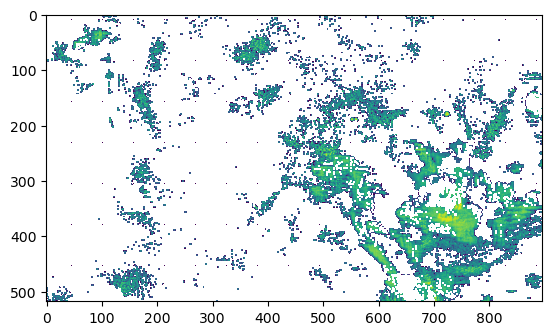

In [127]:
# Calculate the minimum and maximum values, handling NaN values
prec_min = np.nanmin(prec.values)
prec_max = np.nanmax(prec.values)

# Plot `prec` using a logarithmic scale and a colorbar
plt.imshow(prec.values, cmap='viridis', norm=LogNorm())

# Convert extreme values to integer indices
lat_indices = extreme_values_lat.astype(int)
lon_indices = extreme_values_lon.astype(int)

# Overlay `extreme_values` as red points
for lat, lon in zip(lat_indices, lon_indices):
    if prec_thresholded[lat_indices, lon_indices] > threshold:
        plt.scatter(lon, lat, color='red', marker='o')

# Set axis labels and title
plt.xlabel('Longitude (° East)')
plt.ylabel('Latitude (° North)')
plt.title('Prec and Extreme Values')

# Add colorbar
cbar = plt.colorbar(label='Prec')

# Show the plot
plt.show()

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12

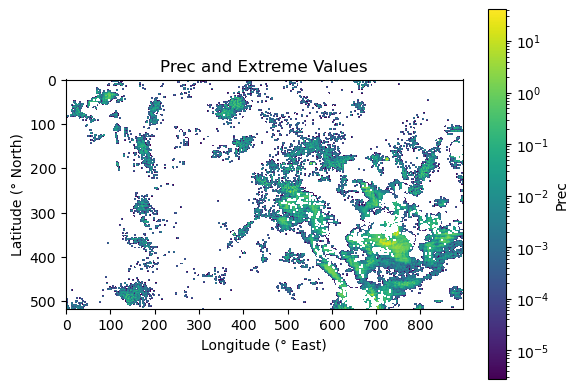

In [132]:
# Calculate the minimum and maximum values, handling NaN values
prec_min = np.nanmin(prec.values)
prec_max = np.nanmax(prec.values)

# Plot `prec` using a logarithmic scale and a colorbar
plt.imshow(prec.values, cmap='viridis', norm=LogNorm())

# Reshape the extreme values arrays to match the shape of prec_thresholded
lat_indices = extreme_values_lat.astype(int).reshape(-1)
lon_indices = extreme_values_lon.astype(int).reshape(-1)
print(lat_indices)

# Overlay `extreme_values` as red points
for lat, lon in zip(lat_indices, lon_indices):
    if prec_thresholded[lat, lon] > threshold:
        print("test")
        plt.scatter(lon, lat, color='red', marker='o')

# Set axis labels and title
plt.xlabel('Longitude (° East)')
plt.ylabel('Latitude (° North)')
plt.title('Prec and Extreme Values')

# Add colorbar
cbar = plt.colorbar(label='Prec')

# Show the plot
plt.show()

/tmp/ipykernel_2145087/3931472521.py:7: RuntimeWarning: divide by zero encountered in log
  positive_data = np.where(variable_data > 0, np.log(variable_data), 0)


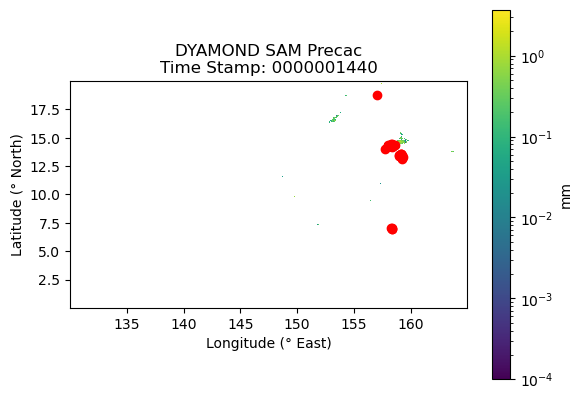

In [43]:
variable_data = prec.values
lon = prec.lon.values
lat = prec.lat.values
fig, ax = plt.subplots()

# Apply logarithmic scaling for positive values
positive_data = np.where(variable_data > 0, np.log(variable_data), 0)
# Plot the variable data
im = plt.imshow(positive_data, origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()], norm=LogNorm(vmin=0.0001)) 

variable_name = "Surface Accum Precip."

# Compute vmax based on non-NaN values
valid_values = positive_data[~np.isnan(positive_data)]
vmax = np.max(valid_values)

plt.xlabel('Longitude (° East)')
plt.ylabel('Latitude (° North)')
title = f"DYAMOND SAM Precac\nTime Stamp: {timestamp_chosen}"
plt.title(title)
# ax.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.5)
cbar = plt.colorbar(im, label="mm")  # Use the variable im here to create the colorbar

# Show the plot
plt.show()

/tmp/ipykernel_2145087/2897574104.py:11: RuntimeWarning: divide by zero encountered in log
  positive_data = np.where(variable_data > 0, np.log(variable_data), 0)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

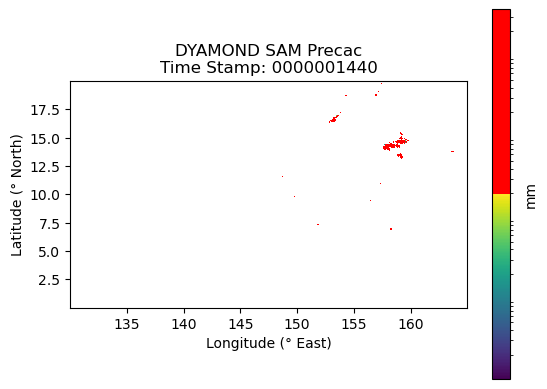

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, LogNorm

# Get the data values, longitude, and latitude
variable_data = prec.values
lon = prec.lon.values
lat = prec.lat.values

# Apply logarithmic scaling for positive values
positive_data = np.where(variable_data > 0, np.log(variable_data), 0)

# Create a custom color map
colors_below_threshold = plt.cm.viridis(np.linspace(0, 1, 256))
colors_above_threshold = np.ones((256, 4))
colors_above_threshold[:, :3] = (1, 0, 0)  # Set color to red
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', np.vstack((colors_below_threshold, colors_above_threshold)))

# Plot the variable data with the custom color map
plt.imshow(positive_data, origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap=custom_cmap, norm=LogNorm(vmin=0.0001))

# Set axis labels and title
plt.xlabel('Longitude (° East)')
plt.ylabel('Latitude (° North)')
title = f"DYAMOND SAM Precac\nTime Stamp: {timestamp_chosen}"
plt.title(title)

# Create a colorbar with the custom color map
cbar = plt.colorbar(label="mm")
cbar.set_ticks([])  # Disable ticks on the colorbar

# Overlay extreme values as red points
mask = variable_data > threshold
plt.scatter(lon[mask], lat[mask], c='red', marker='o')

# Show the plot
plt.show()


/tmp/ipykernel_2145087/3839806270.py:7: RuntimeWarning: divide by zero encountered in log
  positive_data = np.where(variable_data > 0, np.log(variable_data), 0)


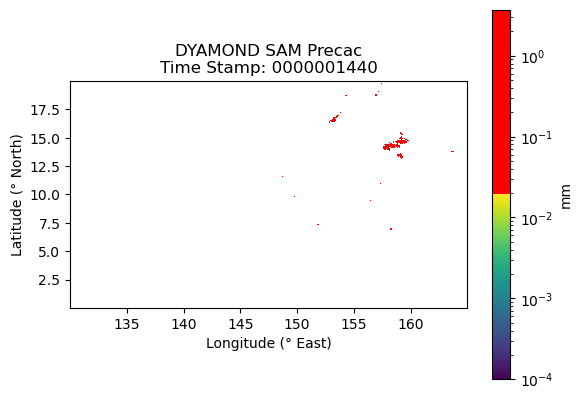

In [63]:
# Get the data values, longitude, and latitude
variable_data = prec.values
lon = prec.lon.values
lat = prec.lat.values

# Apply logarithmic scaling for positive values
positive_data = np.where(variable_data > 0, np.log(variable_data), 0)

# Create a custom color map
colors_below_threshold = plt.cm.viridis(np.linspace(0, 1, 256))
colors_above_threshold = np.ones((256, 4))
colors_above_threshold[:, :3] = (1, 0, 0)  # Set color to red
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', np.vstack((colors_below_threshold, colors_above_threshold)))

# Plot the variable data with the custom color map
plt.imshow(positive_data, origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap=custom_cmap, norm=LogNorm(vmin=0.0001))

# Set axis labels and title
plt.xlabel('Longitude (° East)')
plt.ylabel('Latitude (° North)')
title = f"DYAMOND SAM Precac\nTime Stamp: {timestamp_chosen}"
plt.title(title)

# Create a colorbar with the custom color map
cbar = plt.colorbar(label="mm")
# cbar.set_ticks([])  # Disable ticks on the colorbar

# Overlay extreme values as red pixels
mask = variable_data > threshold
positive_data_masked = np.ma.masked_where(~mask, positive_data)
plt.imshow(positive_data_masked, cmap='Accent', extent=[lon.min(), lon.max(), lat.min(), lat.max()])

# Show the plot
plt.show()